In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
df=pd.read_csv('result.csv')

In [ ]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
8996,https://www.huffingtonpost.com/entry/cdc-direc...,CDC Director Requests Salary Cut After Scrutin...,POLITICS,"Dr. Robert Redfield, who was hired in March, w...",Nina Golgowski,2018-05-01
8997,https://www.huffingtonpost.com/entry/kevin-nic...,Super PAC Screw-Up: Ad Favorably Compares GOP ...,POLITICS,The ad was supposed to help Wisconsin GOP Sena...,Amanda Terkel,2018-05-01
8998,https://www.huffingtonpost.com/entry/ant-man-a...,'Ant-Man And The Wasp' Trailer Brings The Fun ...,ENTERTAINMENT,We're still stressed out.,Cole Delbyck,2018-05-01
8999,https://www.huffingtonpost.com/entry/michelle-...,Here's What You Missed While The Internet Was ...,POLITICS,"Among other happenings, the first fast-food un...",Amanda Terkel,2018-05-01


Data Exploration

In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.memory_usage()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
different=df['category'].unique()
print(different)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS']


In [ ]:
len(different)

29

In [ ]:
ct=df['category']
count_ct=ct.value_counts()
count_ct

POLITICS          3112
ENTERTAINMENT     1519
U.S. NEWS         1115
WORLD NEWS        1020
COMEDY             262
SPORTS             202
CRIME              189
STYLE & BEAUTY     152
WEIRD NEWS         134
MEDIA              123
WELLNESS           116
HOME & LIVING      114
BLACK VOICES       114
ENVIRONMENT        112
FOOD & DRINK       110
PARENTING          110
QUEER VOICES        97
WOMEN               95
BUSINESS            59
CULTURE & ARTS      41
IMPACT              40
SCIENCE             33
MONEY               33
TECH                32
RELIGION            27
TRAVEL              23
EDUCATION           10
LATINO VOICES        5
WEDDINGS             2
Name: category, dtype: int64

Data Visualization

In [ ]:
!pip install dython

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
from dython.nominal import associations
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))


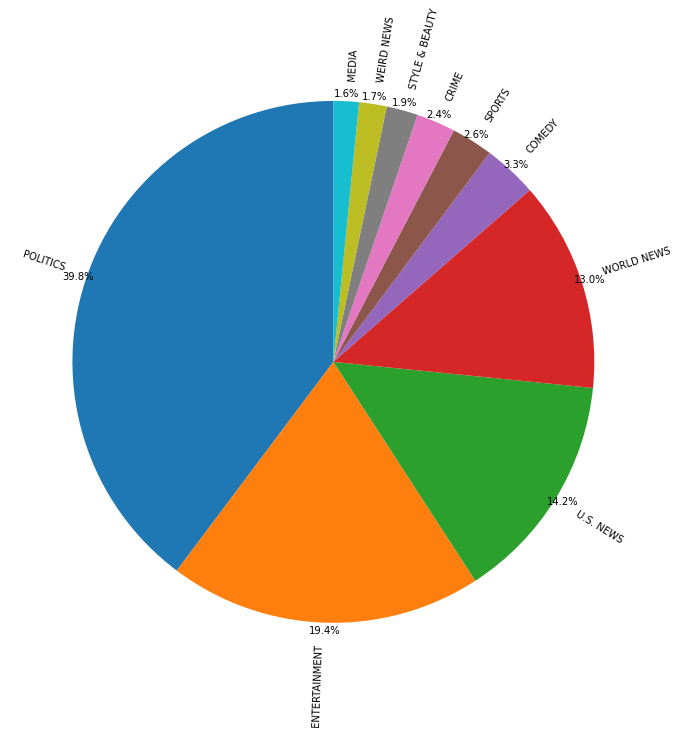

In [ ]:
cat_df = df['category'].value_counts().reset_index()
cat_df.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)
fig = plt.figure(figsize=(12,12))
A = plt.pie(cat_df['numcat'][:10],
            labels=cat_df['news_classes'][:10],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.08,
            pctdistance=1.03,
            rotatelabels=45
            )

plt.show()

In [ ]:
fig = plt.figure(figsize =(30, 30))
plt.bar(different, ct.value_counts())
plt.title('No. news in each category', fontsize=20)
plt.xlabel("Category")
plt.ylabel("Number")
plt.show()

Since there are 29 categories in the category section,we are going to reduce to 15 categories to increase the computing power 

In [ ]:
top_categories = list(df["category"].value_counts().nlargest(15).keys())
print(top_categories)
df_top = df[df['category'].isin(top_categories)]



['POLITICS', 'ENTERTAINMENT', 'U.S. NEWS', 'WORLD NEWS', 'COMEDY', 'SPORTS', 'CRIME', 'STYLE & BEAUTY', 'WEIRD NEWS', 'MEDIA', 'WELLNESS', 'HOME & LIVING', 'BLACK VOICES', 'ENVIRONMENT', 'FOOD & DRINK']


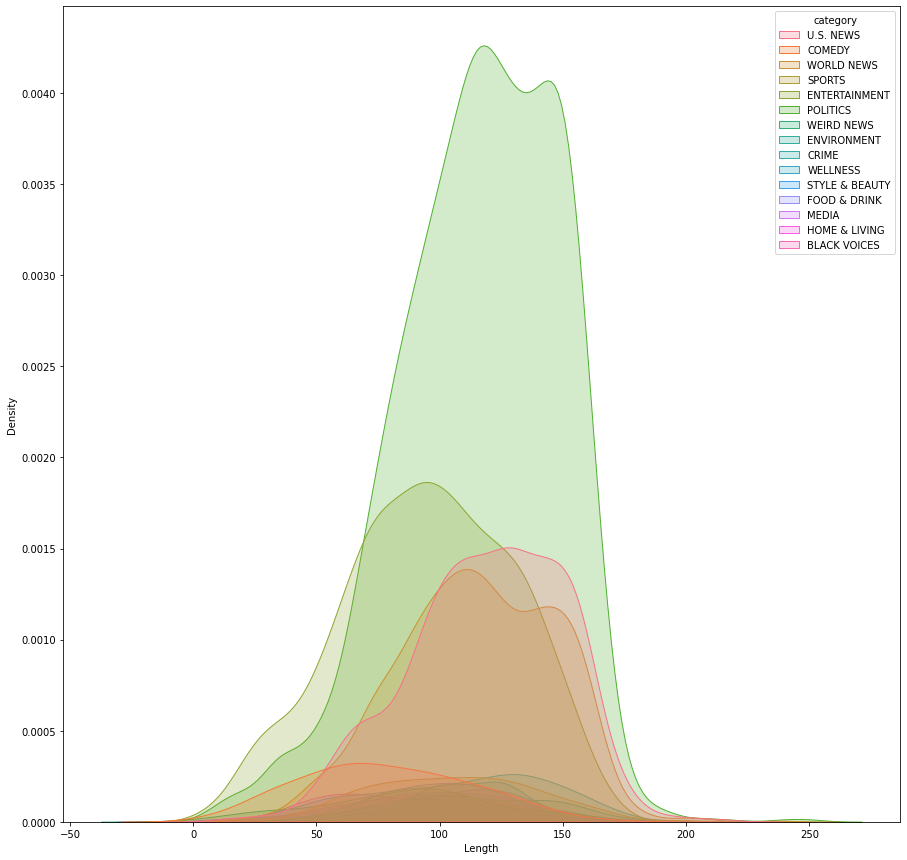

In [ ]:
plt.figure(figsize=(15,15))
df1=df_top.copy()
df1['Length'] = df1['short_description'].str.len()
sns.kdeplot(data=df1, x='Length', hue='category', fill=True)


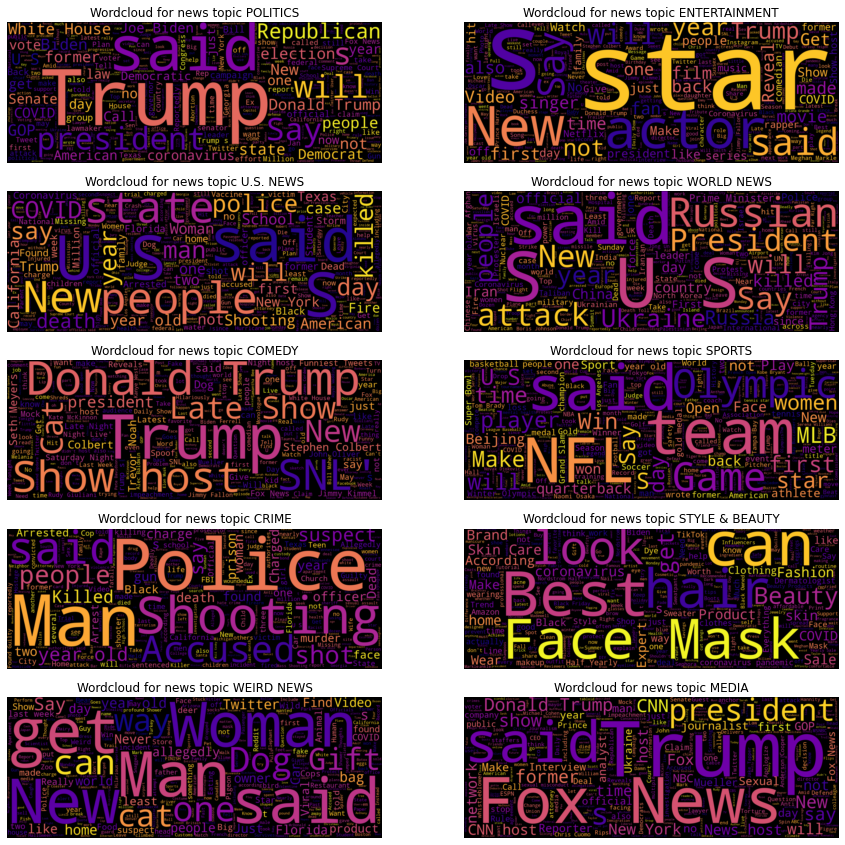

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
final_df = df_top.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df.head()
ndf = final_df.copy()

categories = cat_df['news_classes'][:10].to_list()

articles_list = []

for i in categories:
    cat_ndf = ndf[ndf['category'] == i]
    cat_array = cat_ndf['length_of_news'].values  
    articles_list.append(cat_array)
    
wc1 = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=stopwords)

# plot the figure of 10 wordcloud from out dataset
plt.figure(figsize=(15,15))

for idx, j in enumerate(categories):
    plt.subplot(5,2,idx+1)
    cloud = wc1.generate(' '.join(articles_list[idx]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {j}")
    plt.axis('off')

# Featured Engineering

In [ ]:
df_top.isna().sum()

link                   0
headline               0
category               0
short_description      0
authors              664
date                   0
dtype: int64

In [ ]:
df_top.dropna(inplace=True)
df_top.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

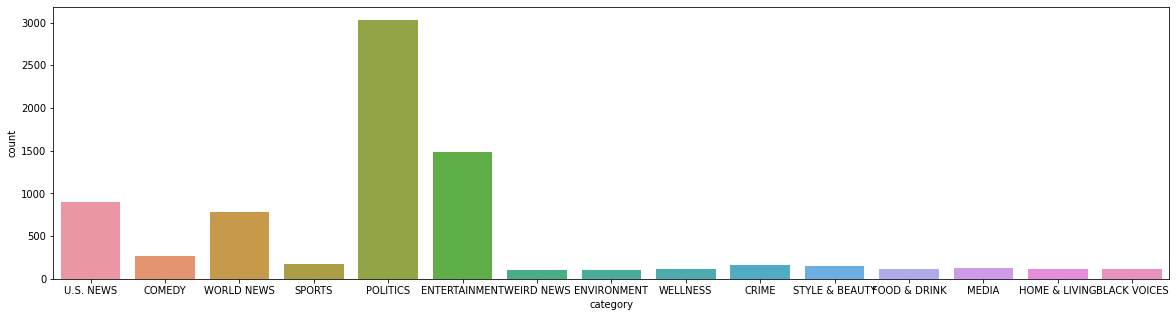

In [ ]:
plt.figure(figsize = [20, 5])
sns.countplot(x=df_top["category"])
plt.show()


As you can see the dataset is imbalanced that is politics have morethan 3000 records but the other categories have less thaan 1500 records.



So Upsampling is performed to create a balanced dataset

In [ ]:
df_list = []
for i in top_categories:
    df_list.append(pd.DataFrame(df_top[df_top["category"]==i]))
for i in range(len(df_list)):
    df_list[i] = pd.DataFrame(df_list[i][df_list[i]["short_description"]!=""])
for i in range(len(df_list)):
    df_list[i] = df_list[i].sample(df_list[0].shape[0], replace=True, random_state=42)
df_upsample = pd.concat(df_list)
df_upsample['category'].value_counts()

POLITICS          3031
ENTERTAINMENT     3031
U.S. NEWS         3031
WORLD NEWS        3031
COMEDY            3031
SPORTS            3031
CRIME             3031
STYLE & BEAUTY    3031
WEIRD NEWS        3031
MEDIA             3031
WELLNESS          3031
HOME & LIVING     3031
BLACK VOICES      3031
ENVIRONMENT       3031
FOOD & DRINK      3031
Name: category, dtype: int64

In [ ]:
data=df_upsample.copy() 

In [ ]:
data['text'] = data['headline'] + data['short_description']
del data['headline']
del data['short_description']
del data['date']
del data['authors']
del data['link']

In [ ]:
data.head()

,category,text
2697,POLITICS,South Carolina Law Forces Death Row Inmates To...
3681,POLITICS,Trump's Former Ghostwriter Has Four Words Of P...
3401,POLITICS,At Least 9 GOP Lawmakers Refused To Wear Masks...
3353,POLITICS,Sunny Hostin Slams Trump Allies For 'Enabling ...
4400,POLITICS,Explosive UFO Report In NYT Mentions 'Off-Worl...


In [ ]:
before_words=data['text'].apply(lambda x: len(x.split(' '))).sum()
print("total words in the dataset before cleaning :",before_words)

total words in the dataset before cleaning : 1222685


In [ ]:
# removing non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)
# removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(alpha_num)
data['text'] = data['text'].apply(remove_stopwords)
data.head()

,category,text
2697,POLITICS,south carolina law forces death row inmates ch...
3681,POLITICS,trumps former ghostwriter four words postpresi...
3401,POLITICS,least 9 gop lawmakers refused wear masks capit...
3353,POLITICS,sunny hostin slams trump allies enabling racis...
4400,POLITICS,explosive ufo report nyt mentions offworld veh...


In [ ]:
after_words=data['text'].apply(lambda x: len(x.split(' '))).sum()
print("total words in the dataset after cleaning :",after_words)

total words in the dataset after cleaning : 819579


In [ ]:
pc=(before_words-after_words)/(before_words)
print("percentage removed",pc*100)

percentage removed 32.96891676924146


Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['category'], test_size=0.2, stratify=data['category'])
le = preprocessing.LabelEncoder()
le.fit(top_categories)

y_train_label = le.transform(y_train)
y_test_label = le.transform(y_test)

tf_idf_vectorizer = TfidfVectorizer()
X_train_t = tf_idf_vectorizer.fit_transform(X_train)
X_test_t = tf_idf_vectorizer.transform(X_test)

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=7, random_state=42,n_iter=7)
X_train_t_final = svd.fit_transform(X_train_t)
X_test_t_final = svd.transform(X_test_t)

Modelling

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
def scores(y_test, pred_test):
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))

Naive Bayes

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
nb = MultinomialNB()
nb.fit(X_train_t, y_train_label)
pred_testnb= nb.predict(X_test_t)
scores(y_test_label,pred_testnb)
      

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label, pred_testnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels= top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_t, y_train_label)
pred_testlr = model.predict(X_test_t)
scores(y_test_label,pred_testlr)


In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label, pred_testlr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels=top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

KNN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_t_final, y_train_label)
pred_testkn = knn.predict(X_test_t_final)
scores(y_test_label,pred_testkn)


Test data accuracy score:  0.967777411195425
Recall score on test data:  0.9677667766776678
Precision score on test data:  0.9669312652817236
F1 score on test data:  0.9669364564940703


In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label, pred_testkn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels=top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

Decision Tree




In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_t_final,y_train_label)
pred_testDT = clf.predict(X_test_t_final)
scores(y_test_label,pred_testDT)
print(classification_report(y_test_label, pred_testDT))


In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label, pred_testDT)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels=top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

SVM

In [ ]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(X_train_t,y_train_label)
pred_testsvm = SVM.predict(X_test_t)
scores(y_test_label,pred_testsvm)
print(classification_report(y_test_label, pred_testsvm))


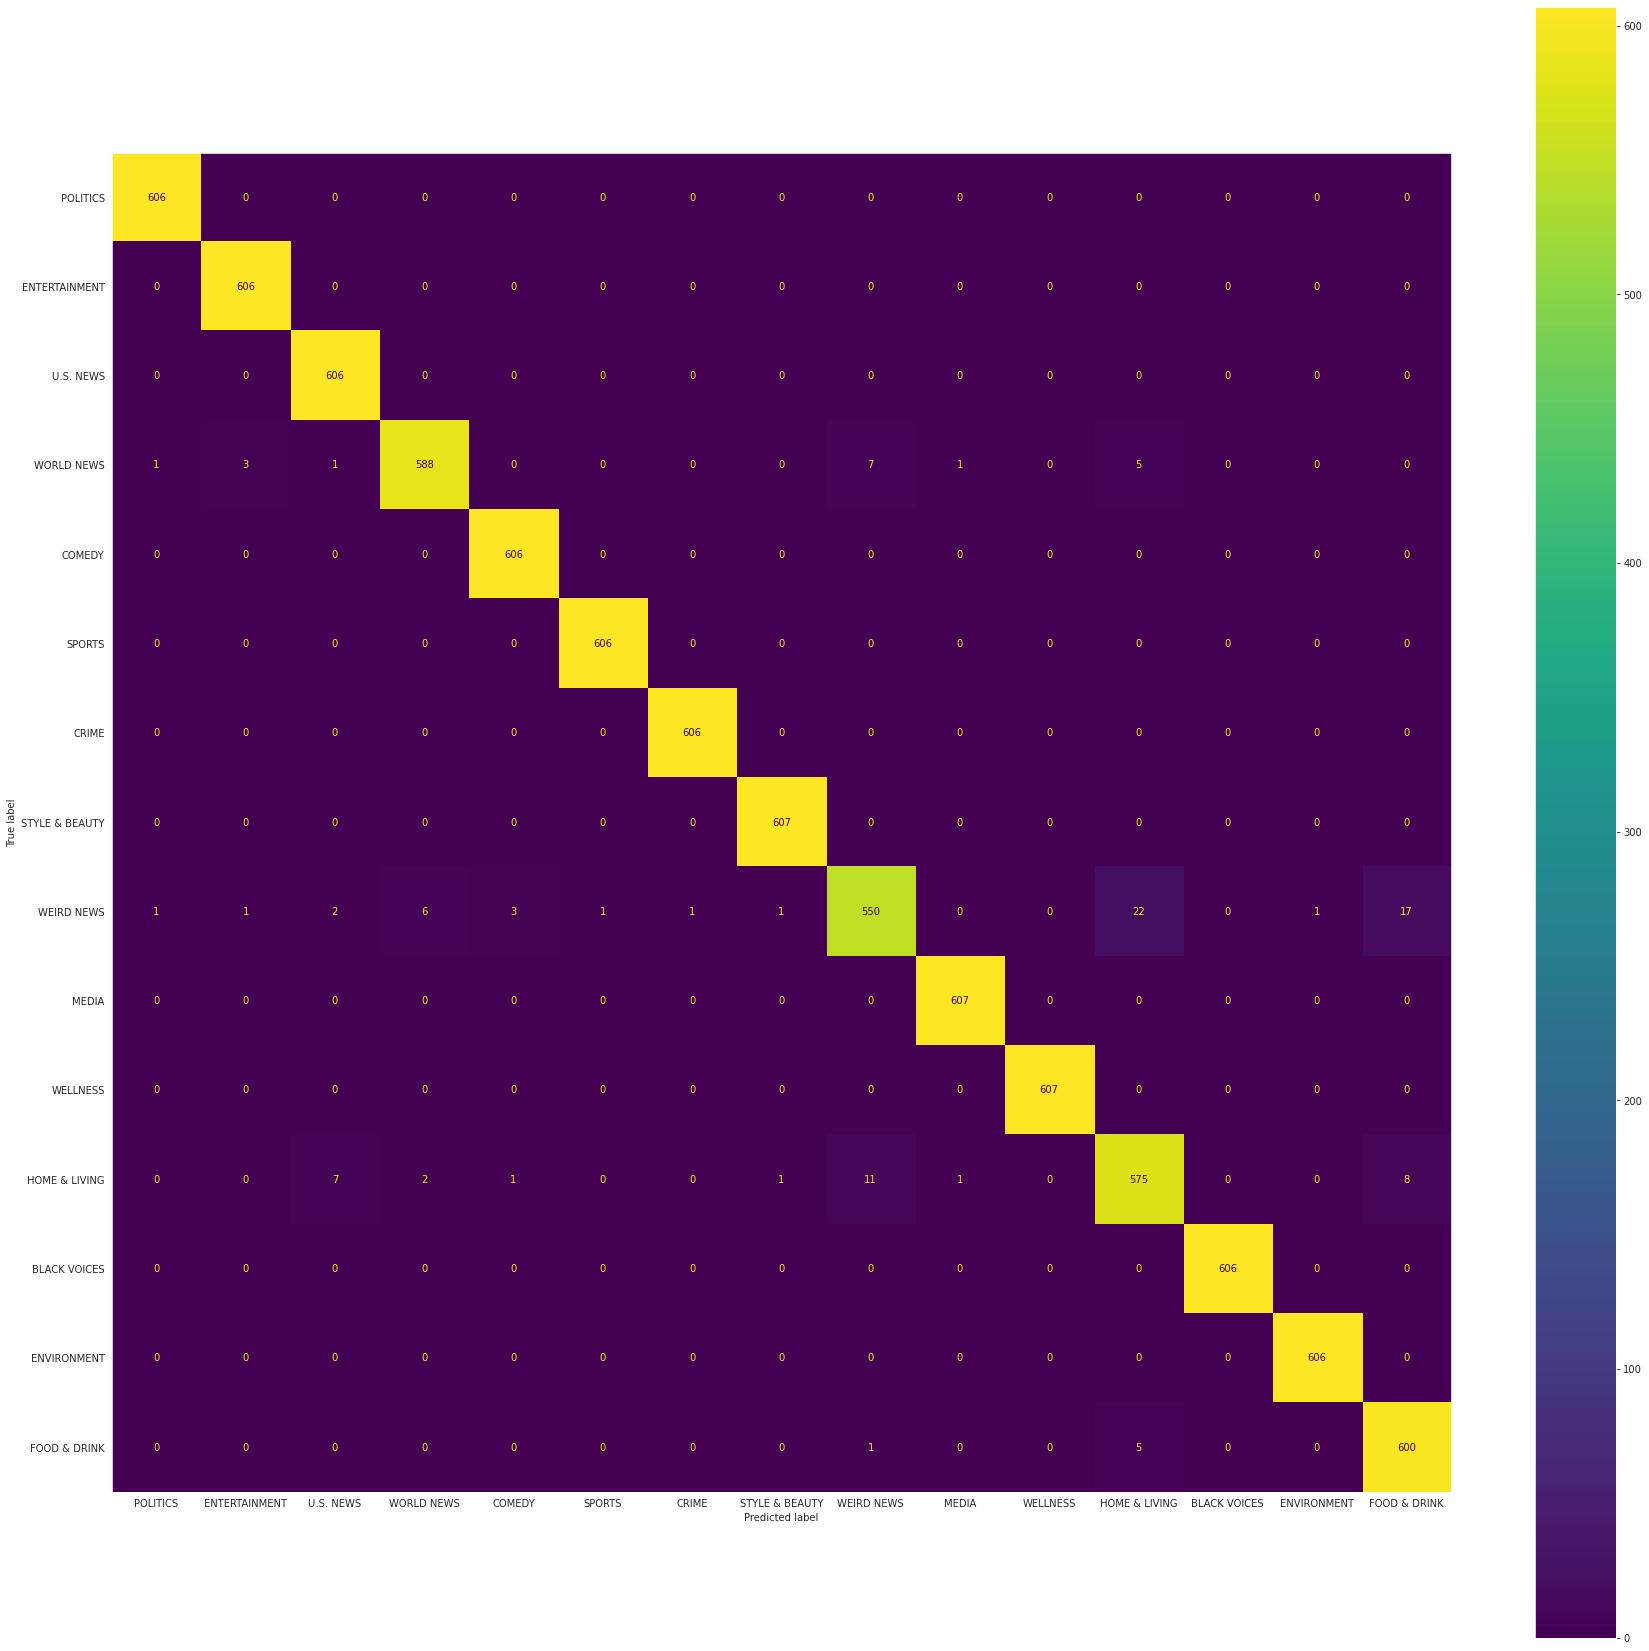

In [113]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label, pred_testsvm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels=top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

Perceptron

In [74]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    max_iter=35,
                    learning_rate_init=0.01)

clf.fit(X_train_t,y_train_label)
pred_testP = clf.predict(X_test_t)
scores(y_test_label,pred_testP)


Iteration 1, loss = 1.11094742
Iteration 2, loss = 0.04467112
Iteration 3, loss = 0.00678523
Iteration 4, loss = 0.00396166
Iteration 5, loss = 0.00321680
Iteration 6, loss = 0.00287529
Iteration 7, loss = 0.00267133
Iteration 8, loss = 0.00255326
Iteration 9, loss = 0.00239242
Iteration 10, loss = 0.00228579
Iteration 11, loss = 0.00218823
Iteration 12, loss = 0.00209600
Iteration 13, loss = 0.00200744
Iteration 14, loss = 0.00192154
Iteration 15, loss = 0.00183778
Iteration 16, loss = 0.00175605
Iteration 17, loss = 0.00167621
Iteration 18, loss = 0.00159836
Iteration 19, loss = 0.00152258
Iteration 20, loss = 0.00144893
Iteration 21, loss = 0.00137784
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test data accuracy score:  0.9857032882437039
Recall score on test data:  0.9856985698569857
Precision score on test data:  0.9856173382201259
F1 score on test data:  0.9855900071996901


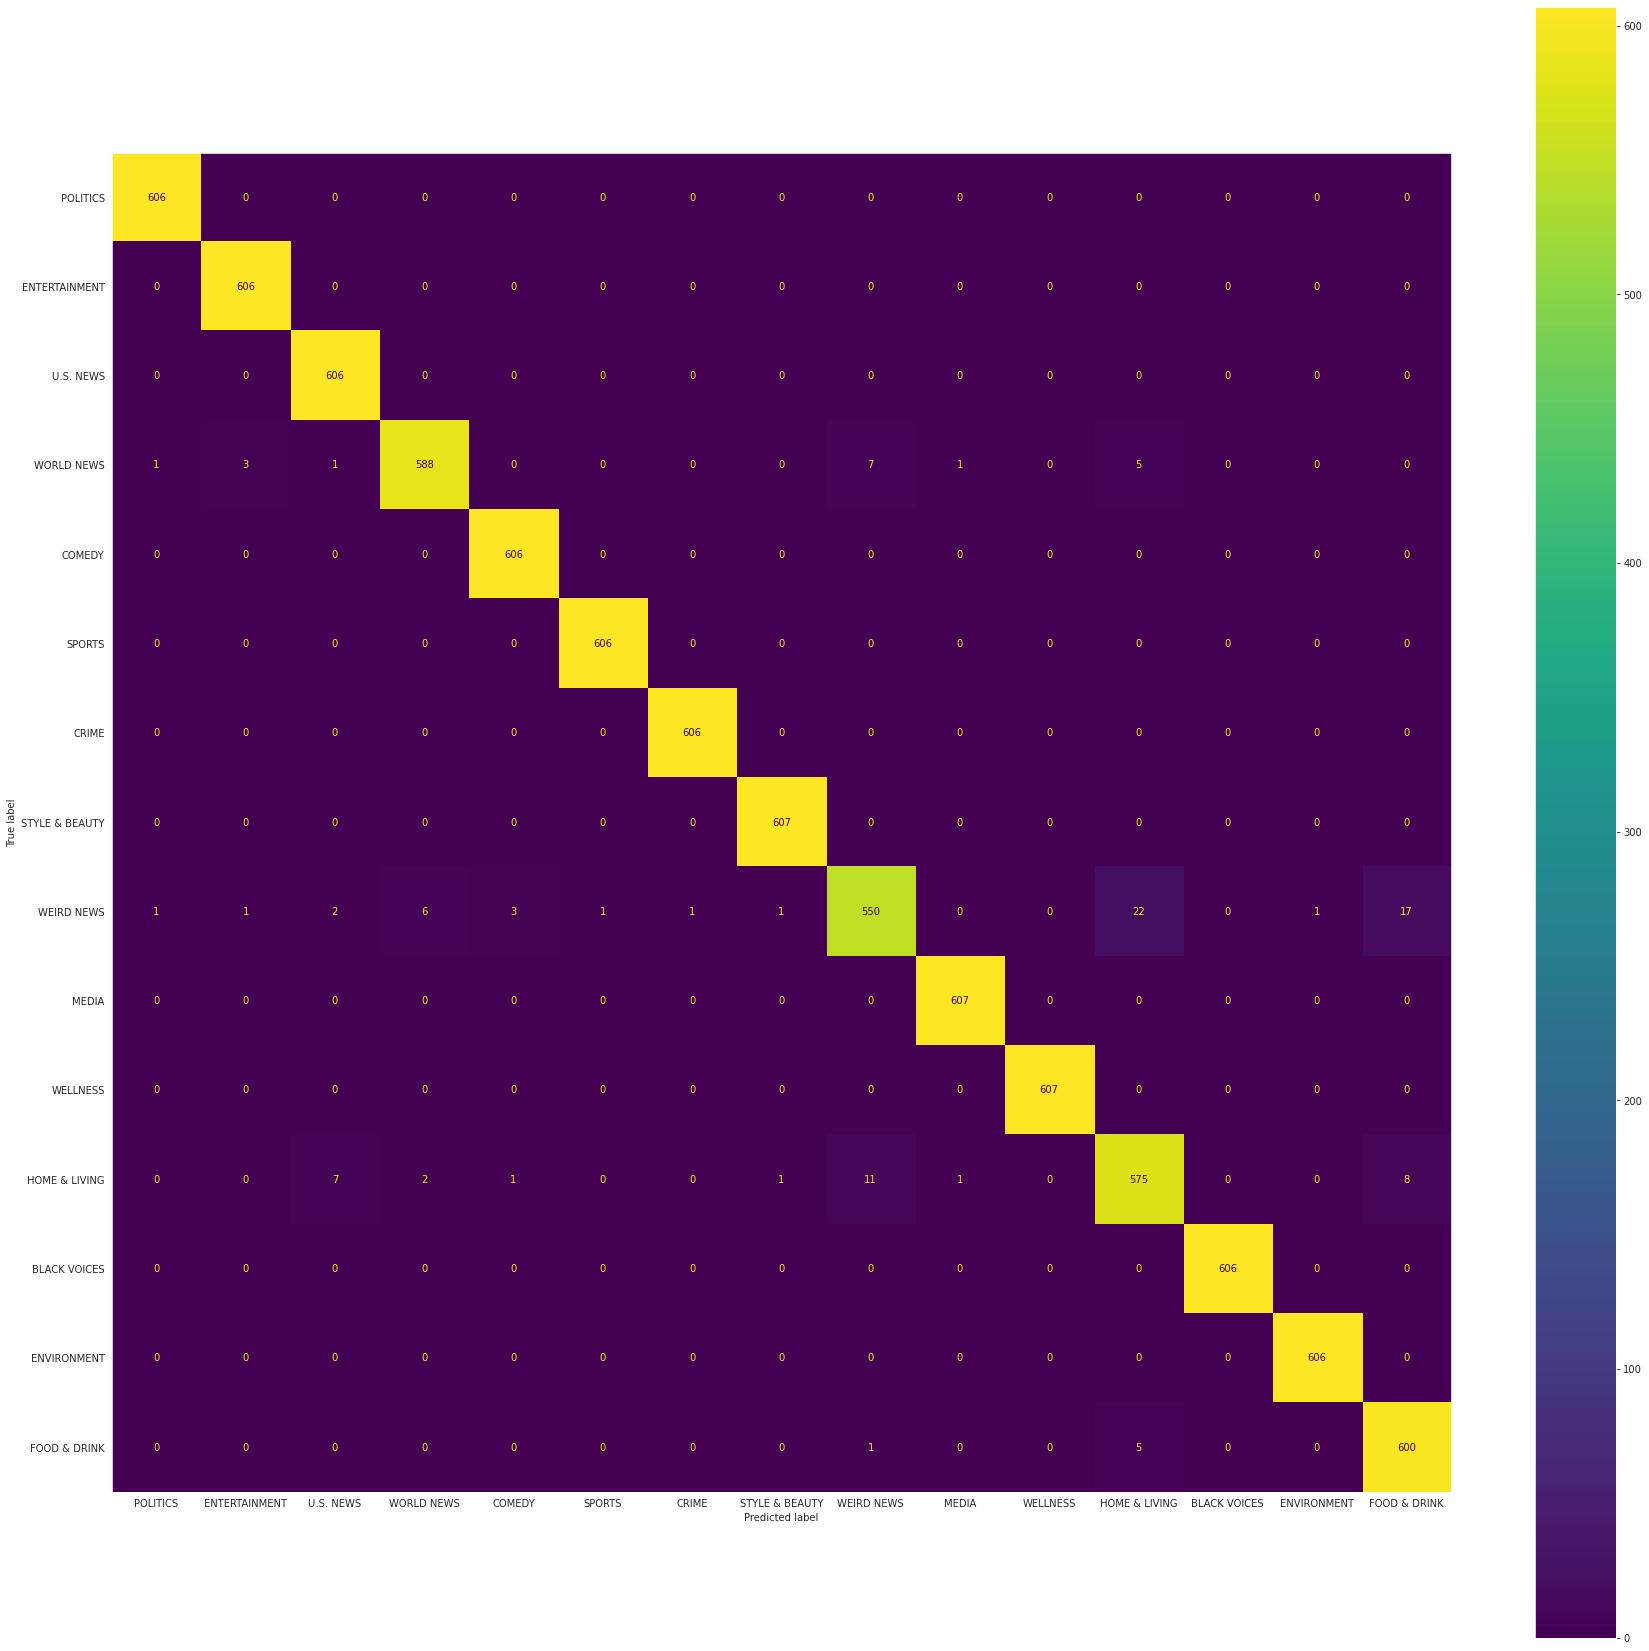

In [114]:
fig, ax = plt.subplots(figsize=(30, 30))
confusion_matrix_p = metrics.confusion_matrix(y_test_label, pred_testP)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb,display_labels=top_categories)
cm_display.plot(ax=ax)
plt.grid(False)
plt.show()

K-Means Clustering

In [60]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

X=data['text']
Y=data['category']
tf_idf_vectorizer = TfidfVectorizer()
X = tf_idf_vectorizer.fit_transform(X)
svd = TruncatedSVD(n_components=7, random_state=42,n_iter=7)
X = svd.fit_transform(X)
Y = le.transform(Y)


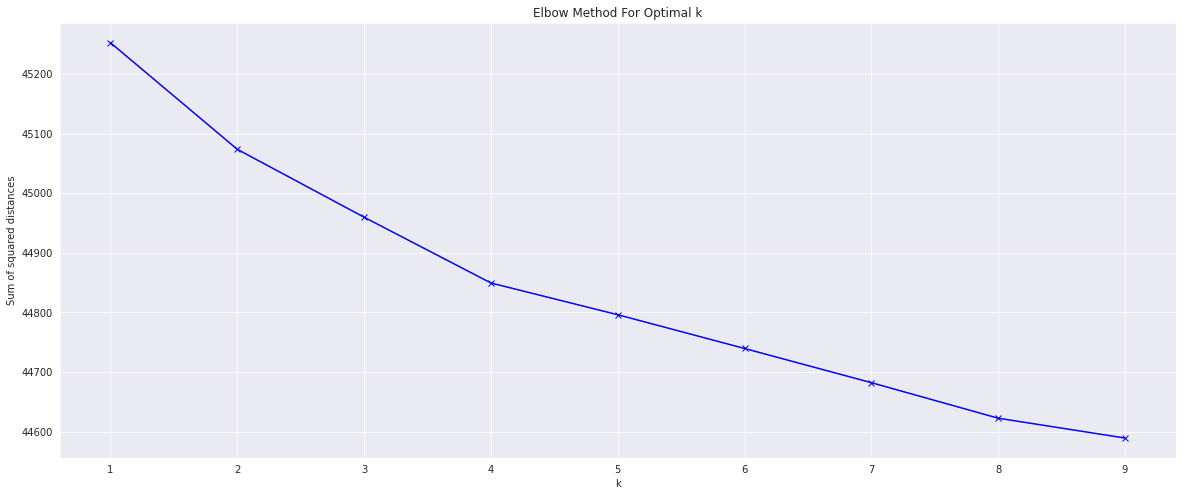

In [55]:
sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=3)  
y_pred_kmeans=kmeans.fit_predict(X)
scores(Y,y_pred_kmeans)
centroids = model.cluster_centers_


Test data accuracy score:  0.09970306829429232
Recall score on test data:  0.09970306829429232
Precision score on test data:  0.02635441614299404
F1 score on test data:  0.03547761284554664


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


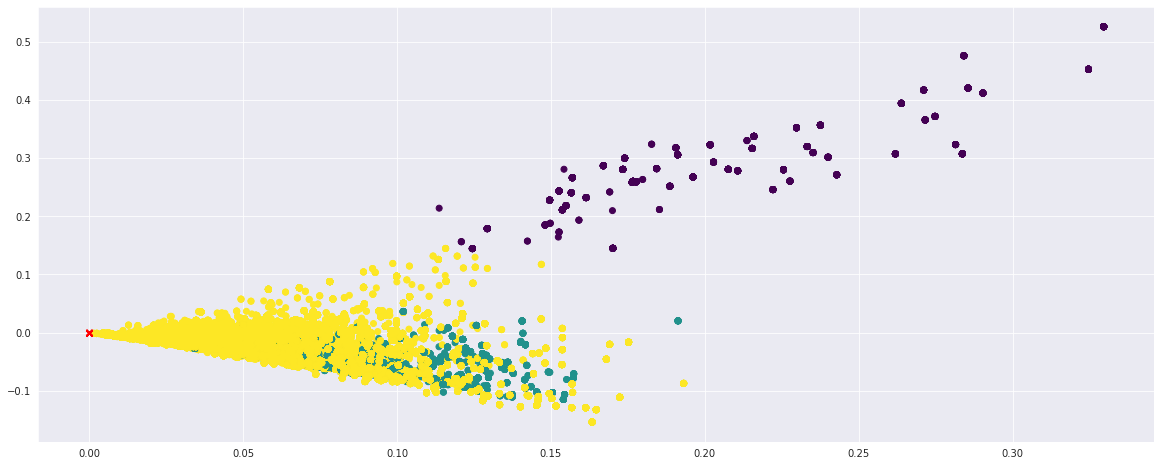

In [120]:
plt.scatter(X[:, 0], X[:, 1],  c=y_pred_kmeans,cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()


# MODEL COMPARISON

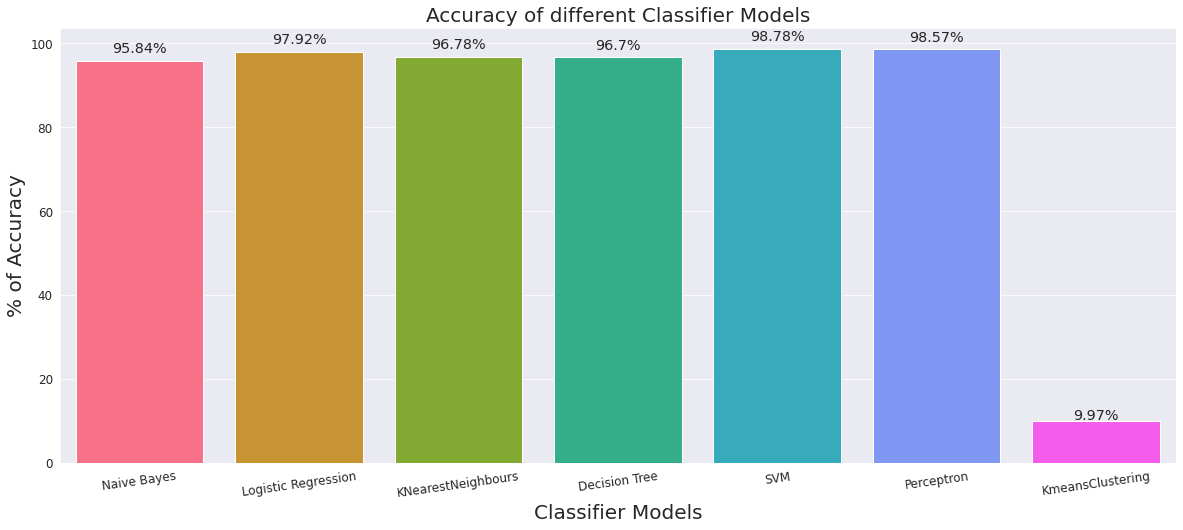

In [122]:
model_list = ['Naive Bayes', 'Logistic Regression', 'KNearestNeighbours','Decision Tree','SVM','Perceptron','KmeansClustering']
accuracy_list = [(metrics.accuracy_score(y_test_label, pred_testnb)*100), (metrics.accuracy_score(y_test_label, pred_testlr)*100),(metrics.accuracy_score(y_test_label, pred_testkn)*100),(metrics.accuracy_score(y_test_label, pred_testDT)*100),(metrics.accuracy_score(y_test_label, pred_testsvm)*100),(metrics.accuracy_score(y_test_label,pred_testP )*100),(metrics.accuracy_score(Y, y_pred_kmeans)*100)]
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#SVM with PCA 

In [107]:
from sklearn.decomposition import PCA
clf = TruncatedSVD(100)
X_sp = clf.fit_transform(X_train_t)
pca = PCA(n_components=2)
X_pca=pca.fit(X_sp)

In [139]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train_t_final)
X_test = pca.transform(X_test_t_final)

clf = SVC()
clf.fit(X_train_t_final, y_train_label)

accuracy = clf.score(X_test_t_final, y_test_label)
print('Test accuracy:', accuracy)





Test accuracy: 0.46387330913889807


# Test Function

In [124]:
tf = TfidfVectorizer()
tf.fit_transform(X_train)
news=["Messi won the world cup"]
news_tf = tf.transform(news)
y_pred = SVM.predict(news_tf)

ll = preprocessing.LabelEncoder()
ll.fit(top_categories)
y_pred_labels = ll.inverse_transform(y_pred)

print(y_pred_labels)

['SPORTS']
